In [44]:
import pandas as pd
import numpy as np
import json
import peakutils
import matplotlib.pyplot as plt

In [3]:
def load_json(file):
    '''
    Loads txt file and returns json dict
    '''
    data = {}
    with open(file, encoding='utf-8') as f:
        for line in f:
            d = str(line).replace("'", '"')
            data = json.loads(d)
    
    return data

In [52]:
drive0 = load_json("activity-data/driving0.txt")

In [91]:
def process_sequence(file):
    '''
    Loads data and creates dictionary of calculations from accelerometer data
    '''
    data = load_json(file)
    
    # obtain actitivy from trace
    activity = data['type']
    
    # obtain accelerometer data from each axis
    x_accl = []
    y_accl = []
    z_accl = []
    for seq in data['seq']:
        x_accl.append(seq['data']['xAccl'])
        y_accl.append(seq['data']['yAccl'])
        z_accl.append(seq['data']['zAccl'])
    
    # obtain gyroscope data from each axis
    x_gyro = []
    y_gyro = []
    z_gyro = []
    for seq in data['seq']:
        x_gyro.append(seq['data']['xGyro'])
        y_gyro.append(seq['data']['yGyro'])
        z_gyro.append(seq['data']['zGyro'])
    
    # obtain mag sensor data from each axis
    x_mag = []
    y_mag = []
    z_mag = []
    for seq in data['seq']:
        x_mag.append(seq['data']['xMag'])
        y_mag.append(seq['data']['yMag'])
        z_mag.append(seq['data']['zMag'])    
        
    # calculate means for data sequence
    x_accl_mean = np.mean(x_accl)
    y_accl_mean = np.mean(y_accl)
    z_accl_mean = np.mean(z_accl)
    x_gyro_mean = np.mean(x_gyro)
    y_gyro_mean = np.mean(y_gyro)
    z_gyro_mean = np.mean(z_gyro)
    x_mag_mean = np.mean(x_mag)
    y_mag_mean = np.mean(y_mag)
    z_mag_mean = np.mean(z_mag)
    
    # calculate standard deviations for sequence
    x_accl_sd = np.std(x_accl)
    y_accl_sd = np.std(y_accl)
    z_accl_sd = np.std(z_accl)
    x_gyro_sd = np.std(x_gyro)
    y_gyro_sd = np.std(y_gyro)
    z_gyro_sd = np.std(z_gyro)
    x_mag_sd = np.std(x_mag)
    y_mag_sd = np.std(y_mag)
    z_mag_sd = np.std(z_mag)
    
    # calculate number of peaks for sequence
    x_accl_peaks = len(peakutils.indexes(x_accl, thres=0.02/max(x_accl), min_dist=0.1))
    y_accl_peaks = len(peakutils.indexes(y_accl, thres=0.02/max(y_accl), min_dist=0.1))
    z_accl_peaks = len(peakutils.indexes(z_accl, thres=0.02/max(z_accl), min_dist=0.1))
    x_gyro_peaks = len(peakutils.indexes(x_gyro, thres=0.02/max(x_gyro), min_dist=0.1))
    y_gyro_peaks = len(peakutils.indexes(y_gyro, thres=0.02/max(y_gyro), min_dist=0.1))
    z_gyro_peaks = len(peakutils.indexes(z_gyro, thres=0.02/max(z_gyro), min_dist=0.1))
    x_mag_peaks = len(peakutils.indexes(x_mag, thres=0.02/max(x_mag), min_dist=0.1))
    y_mag_peaks = len(peakutils.indexes(y_mag, thres=0.02/max(y_mag), min_dist=0.1))
    z_mag_peaks = len(peakutils.indexes(z_mag, thres=0.02/max(z_mag), min_dist=0.1))
    
    # store processed data in dictionary
    clean_data = {'activity': activity,
                  'x_accl_mean': x_accl_mean, 'x_accl_sd': x_accl_sd, 'x_accl_peaks': x_accl_peaks,
                  'y_accl_mean': y_accl_mean, 'y_accl_sd': y_accl_sd, 'y_accl_peaks': y_accl_peaks,
                  'z_accl_mean': z_accl_mean, 'z_accl_sd': z_accl_sd, 'z_accl_peaks': z_accl_peaks,
                  'x_gyro_mean': x_gyro_mean, 'x_gyro_sd': x_gyro_sd, 'x_gyro_peaks': x_gyro_peaks,
                  'y_gyro_mean': y_gyro_mean, 'y_gyro_sd': y_gyro_sd, 'y_gyro_peaks': y_gyro_peaks,
                  'z_gyro_mean': z_gyro_mean, 'z_gyro_sd': z_gyro_sd, 'z_gyro_peaks': z_gyro_peaks, 
                  'x_mag_mean': x_mag_mean, 'x_mag_sd': x_mag_sd, 'x_mag_peaks': x_mag_peaks, 
                  'y_mag_mean': y_mag_mean, 'y_mag_sd': y_mag_sd, 'y_mag_peaks': y_mag_peaks,
                  'z_mag_mean': z_mag_mean, 'z_mag_sd': z_mag_sd, 'z_mag_peaks': z_mag_peaks}
    
    cols = ['activity', 'x_accl_mean', 'x_accl_sd', 'x_accl_peaks',
            'y_accl_mean', 'y_accl_sd', 'y_accl_peaks',
            'z_accl_mean', 'z_accl_sd', 'z_accl_peaks',
            'x_gyro_mean', 'x_gyro_sd', 'x_gyro_peaks',
            'y_gyro_mean', 'y_gyro_sd', 'y_gyro_peaks',
            'z_gyro_mean', 'z_gyro_sd', 'z_gyro_peaks', 
            'x_mag_mean', 'x_mag_sd', 'x_mag_peaks', 
            'y_mag_mean', 'y_mag_sd', 'y_mag_peaks',
            'z_mag_mean', 'z_mag_sd', 'z_mag_peaks']
    data_list = [activity, x_accl_mean, x_accl_sd, x_accl_peaks,
                y_accl_mean, y_accl_sd, y_accl_peaks,
                z_accl_mean, z_accl_sd, z_accl_peaks,
                x_gyro_mean, x_gyro_sd, x_gyro_peaks,
                y_gyro_mean, y_gyro_sd, y_gyro_peaks,
                z_gyro_mean, z_gyro_sd, z_gyro_peaks, 
                x_mag_mean, x_mag_sd, x_mag_peaks, 
                y_mag_mean, y_mag_sd, y_mag_peaks,
                z_mag_mean, z_mag_sd, z_mag_peaks] 
    
    df = pd.DataFrame(clean_data, index=[])
    return df

In [92]:
df = process_sequence('activity-data/driving0.txt')

In [93]:
df

,activity,x_accl_mean,x_accl_peaks,x_accl_sd,x_gyro_mean,x_gyro_peaks,x_gyro_sd,x_mag_mean,x_mag_peaks,x_mag_sd,...,y_mag_sd,z_accl_mean,z_accl_peaks,z_accl_sd,z_gyro_mean,z_gyro_peaks,z_gyro_sd,z_mag_mean,z_mag_peaks,z_mag_sd


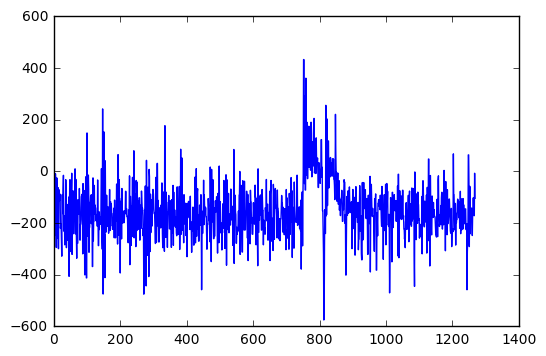

In [46]:
plt.plot(x_accl)
plt.show()

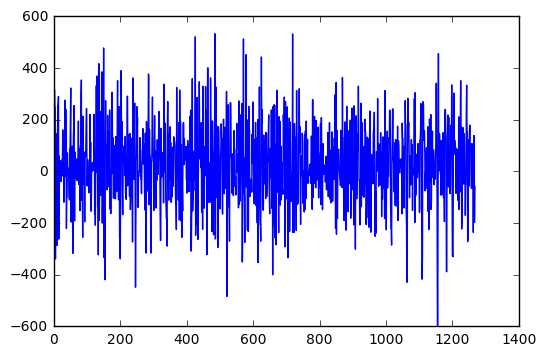

In [37]:
plt.plot(y_accl)
plt.show()

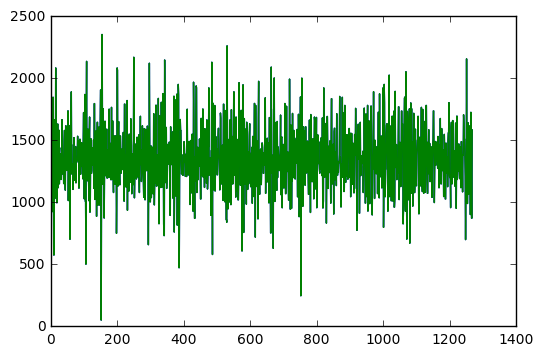

In [39]:
plt.plot(z_accl)
plt.show()